In [94]:
from __future__ import division # Trick to enforce float division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint, quad

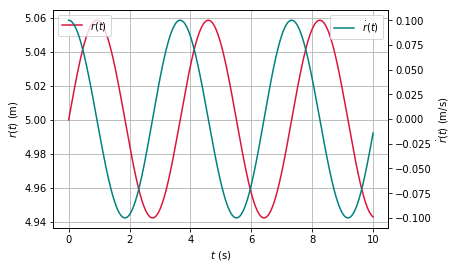

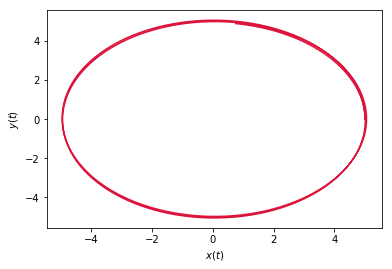

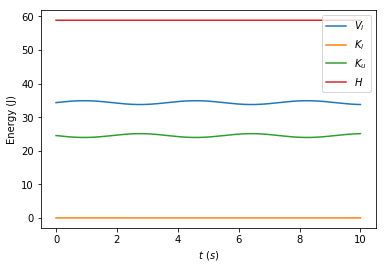

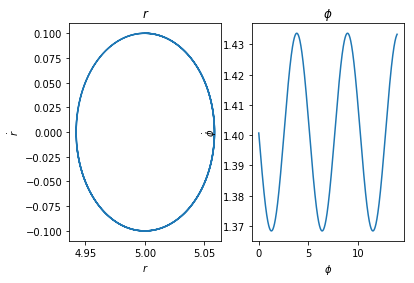

In [127]:
# Define constants and initial conditions

g = 9.81 # m/s^2
m = 1.0 # kg -- mass of the particles 
t0 = 0 # s
r0 = 5.0 # m
rdot0 = 0.1 # m/s
phi0 = 0 # Initial angle
#phidot0 = 1.0 # s^-1 -- initial angular velocity
phidot0 = np.sqrt(g/r0) # This is the condition for r'' to be zero initially (right hand side of EoM cancels). This makes the motion approximately harmonic in r.
p_phi = m*r0**2*phidot0 # kg m^2/s -- phi angular momentum, conserved

# Set up and solve equation system
def ode_system(y,t):
	# We write r as a system of two first-order equations in the standard way, 
    # and also include phi in the equation system
	r, drdt, phi = y
	dydt = [drdt, -g/2 + p_phi**2/(2*m**2*r**3), p_phi/(m*r**2)]
	return dydt

y0 = [r0, rdot0, phi0]
t = np.linspace(0,10,2001)
solution = odeint(ode_system, y0, t) # the money call
r = solution[:,0]
rdot = solution[:,1]
phi = solution[:,2]
phidot = p_phi/(m*r**2)


# Plot r and rdot as function of t, with separate axes:
f_r, ax_r = plt.subplots(1,1)
ax_r.plot(t, r, 'crimson', label=r"$r(t)$")
ax_drdt = ax_r.twinx()
ax_drdt.plot(t, rdot, 'teal', label=r"$\dot{r}(t)$")
ax_r.legend(loc='upper left')

ax_drdt.legend(loc='upper right')
ax_r.set_xlabel(r'$t\,\,\mathrm{(s)}$')
ax_r.set_ylabel(r"$r(t)\,\,\mathrm{(m)}$")
ax_drdt.set_ylabel(r"$\dot{r}(t)\,\,\mathrm{(m/s)}$")
ax_r.grid()
f_r.savefig("oblig3_3b.pdf")




# Plot position of upper mass in x,y plane
x = r*np.cos(phi)
y = r*np.sin(phi)
f_xy, ax_xy = plt.subplots(1,1)
ax_xy.plot(x, y, 'crimson')
ax_xy.set_xlabel("$x(t)$")
ax_xy.set_ylabel("$y(t)$")



# Plot time evolution of energy
l = 1.5 # Constant length of rope, only matters for total potential energy
z = r - l # Position of lower mass

V_lower = m*g*z # Potential energy of lower mass
K_lower = 0.5*m*rdot**2 # Kinetic energy of lower mass
K_upper = 0.5*m*(rdot**2 + (r*phidot)**2) # Kinetic energy of upper mass
H = V_lower + K_lower + K_upper # Total energy, Hamiltonian


f_energy, ax_energy = plt.subplots(1,1)
ax_energy.plot(t, V_lower, label='$V_l$')
ax_energy.plot(t, K_lower, label='$K_l$')
ax_energy.plot(t, K_upper, label='$K_u$')
ax_energy.plot(t, H, label='$H$')
ax_energy.set_ylabel("Energy (J)")
ax_energy.set_xlabel("$t\,\,(s)$")
ax_energy.legend()



# Phase space plots
f_phasespace, ax_phasespace = plt.subplots(1,2)
ax_phasespace[0].plot(r, rdot)
ax_phasespace[0].set_xlabel("$r$")
ax_phasespace[0].set_ylabel("$\dot{r}$")
ax_phasespace[0].set_title("$r$")
ax_phasespace[1].plot(phi, phidot)
ax_phasespace[1].set_xlabel("$\phi$")
ax_phasespace[1].set_ylabel("$\dot{\phi}$")
ax_phasespace[1].set_title("$\phi$")




plt.show()

